## Outline: 
    
1. Package intro
2. How to read food webs from file?
3. How to work with food webs?
4. How to visualize food webs?

# foodwebviz 

foodwebviz is a Python package for the creation and visualization of foodwebs / thropic networks.

In [1]:
import foodwebviz as fw

# How to read food webs?

`fw.read_from_SCOR(scor_path)` allows to read food web from a file in the SCOR format

`scor_path` can be an absolute or a relative path

In [2]:
foodweb = fw.read_from_SCOR('data/Richards_Bay_C_Summer.dat')

Reading file: data/Richards_Bay_C_Summer.dat


# How to work with food webs? 

Let's check some basic information about a food web:

In [3]:
print(f'Title: {foodweb.title}\n')
print(f'Number of nodes: {foodweb.n}')
print(f'Number of living nodes: {foodweb.n_living}')

Title: Table 5. Flow data for the Richards Bay Summer carbon network. Rows = prey, Columns = predator. B = biomass, I = import. R = respiration, E = export.

Number of nodes: 33
Number of living nodes: 29


Let's see the first rows of the table with information on nodes (vertices) - pandas.DataFrame:

In [4]:
foodweb.node_df.head(5)

IsAlive  Biomass  Import  Export  Respiration  TrophicLevel
Names                                                                      
Diatoms            True   0.5011     0.0     0.0       74.649      2.000000
Flagellates        True   0.3424     0.0     0.0       53.438      2.000000
Bacteria           True   0.5200     0.0     0.0       27.560      2.029999
HM plankton        True   0.0818     0.0     0.0        5.892      2.029986
Small copepods     True   0.0375     0.0     0.0        3.450      2.868366

The information about biomass flows is encoded in the flow matrix:

In [5]:
foodweb.flow_matrix

Names                           Diatoms  Flagellates  Bacteria  HM plankton  \
Names                                                                         
Diatoms                             0.0          0.0     1.677        0.264   
Flagellates                         0.0          0.0     1.677        0.264   
Bacteria                            0.0          0.0     0.000        0.000   
HM plankton                         0.0          0.0     0.000        0.000   
Small copepods                      0.0          0.0     0.000        0.000   
Medium copepods                     0.0          0.0     0.000        0.000   
Large copepods                      0.0          0.0     0.000        0.000   
Other lg zooplankton                0.0          0.0     0.000        0.000   
Sm macrobenthos                     0.0          0.0     0.000        0.000   
Lg suspension feeder                0.0          0.0     0.000        0.000   
Echinoderm                          0.0          0.0     0.000        0.000   
Mollusc                             0.0          0.0     0.000        0.000   
Prawn & shrimp                      0.0          0.0     0.000        0.000   
Large crustacean                    0.0          0.0     0.000        0.000   
Cuttlefish                          0.0          0.0     0.000        0.000   
Other cephalopod                    0.0          0.0     0.000        0.000   
Flatfish                            0.0          0.0     0.000        0.000   
Gurnard                             0.0          0.0     0.000        0.000   
Other benthic carnivorous fish      0.0          0.0     0.000        0.000   
Lizardfish                          0.0          0.0     0.000        0.000   
Red tjor-tjor                       0.0          0.0     0.000        0.000   
Pinky                               0.0          0.0     0.000        0.000   
Other benthopelagic fish            0.0          0.0     0.000        0.000   
Sm pelagic fish                     0.0          0.0     0.000        0.000   
Lg pelagic fish                     0.0          0.0     0.000        0.000   
Skates and rays                     0.0          0.0     0.000        0.000   
Sm benthic shark                    0.0          0.0     0.000        0.000   
Large sharks                        0.0          0.0     0.000        0.000   
Cetaceans                           0.0          0.0     0.000        0.000   
Susp POC                            0.0          0.0     4.472        0.704   
Sed POC                             0.0          0.0     1.118        0.176   
DOC                                 0.0          0.0   102.860       16.200   
DIC                               372.8        267.9     0.000        0.000   

Names                           Small copepods  Medium copepods  \
Names                                                             
Diatoms                                 2.8900           1.8000   
Flagellates                             2.0600           1.2300   
Bacteria                                0.1860           0.7910   
HM plankton                             0.0012           0.0048   
Small copepods                          0.1240           0.8780   
Medium copepods                         0.0000           0.0799   
Large copepods                          0.0000           0.0000   
Other lg zooplankton                    0.0000           0.0000   
Sm macrobenthos                         0.0000           0.0000   
Lg suspension feeder                    0.0000           0.0000   
Echinoderm                              0.0000           0.0000   
Mollusc                                 0.0000           0.0000   
Prawn & shrimp                          0.0000           0.0000   
Large crustacean                        0.0000           0.0000   
Cuttlefish                              0.0000           0.0000   
Other cephalopod                        0.0000           0.0000   
Flatfish                    

# How to visualize food webs?

## A heatmap of food web flows

The heatmap representation of a food web has the network's nodes on its axes. The color intensity at the intersection of rows and columns marking these nodes represents the biomass flow from the node in row to the node in the column. Additionally, trophic levels related to the nodes can be showed as background colour.

The heatmap can also show biomass flows normalised, e.g. to the total inflows (to show diet proportions) of the target node, or to the biomass of the source node (as in donor-control model), or to the sum of all flows in the network (total system throughflow, TST). The normalisation to TST is a natural way of comparing food webs with each other, as each food web is likely to use different units. 

The documentation of draw_hetmap() method that implements it is presented below:

In [6]:
help(fw.draw_heatmap)

Help on function draw_heatmap in module foodwebviz.visualization:

draw_heatmap(food_web, boundary=False, normalization='log', show_trophic_layer=True, switch_axes=False, width=1200, height=800)
    Visualize foodweb as a heatmap. On the interesction
    of X axis ("from" node) and Y axis ("to" node) flow weight
    is indicated.
    
    Parameters
    ----------
    food_web : foodwebs.FoodWeb
        Foodweb object.
    boundary : bool, optional (default=False)
        If True, boundary flows will be added to the graph.
        Boundary flows are: Import, Export, and Repiration.
    normalization : string, optional (default=log)
        Defines method of graph edges normalization.
        Available options are: 'diet', 'log', 'donor_control',
        'predator_control', 'mixed_control', 'linear' and 'tst'.
    show_trophic_layer : bool, optional (default=False)
        If True, include additional heatmap layer presenting trophic levels relevant to X axis.
    switch_axes : bool, opt

Example usage:

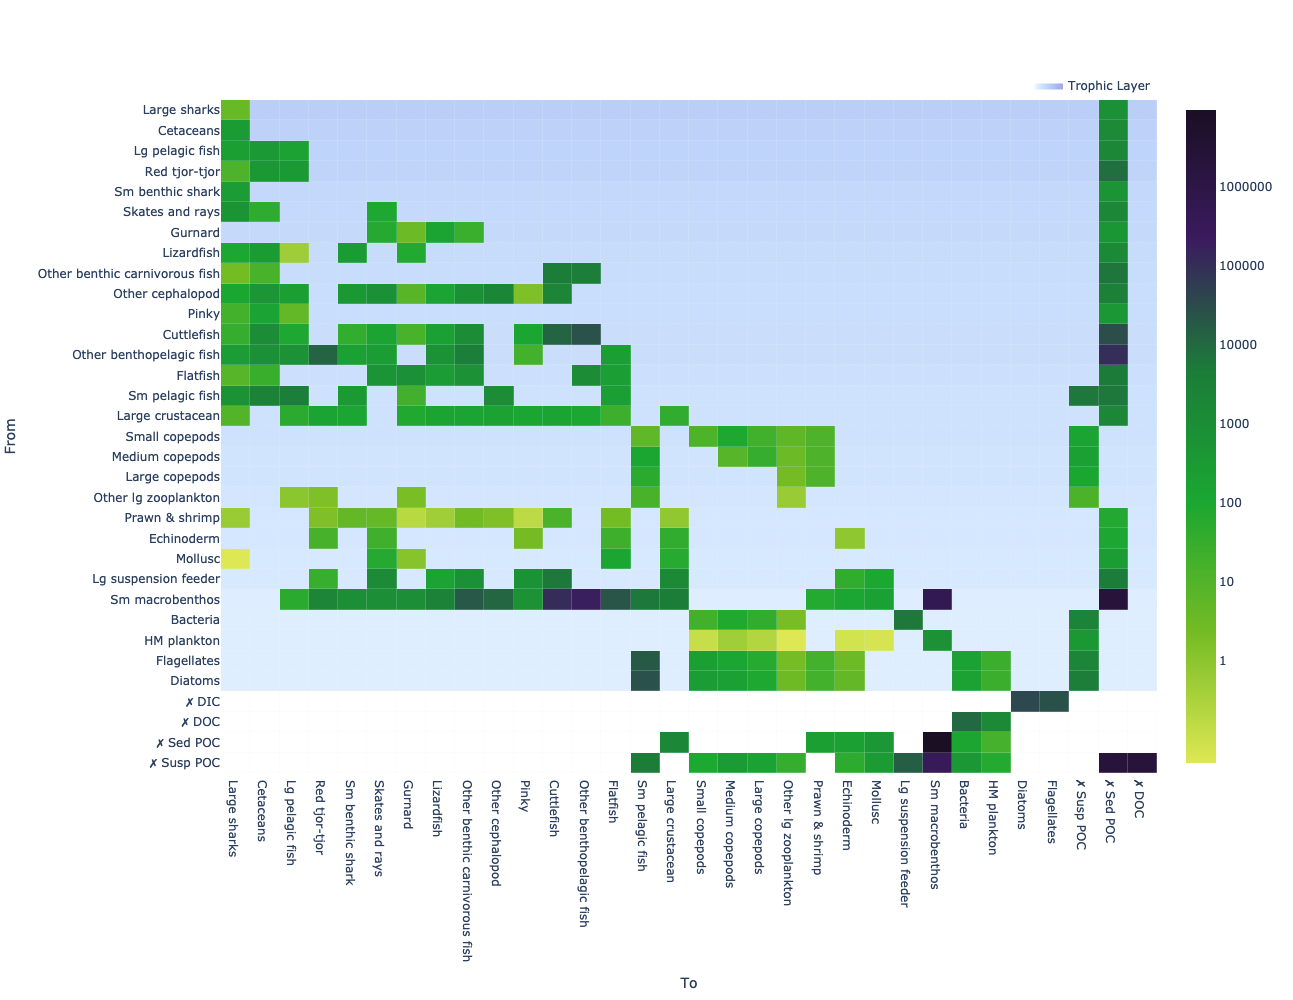

In [7]:
fw.draw_heatmap(foodweb, normalization='log', show_trophic_layer=True, boundary=False, height=1000)

The same heatmap, but with 'diet' normalization:

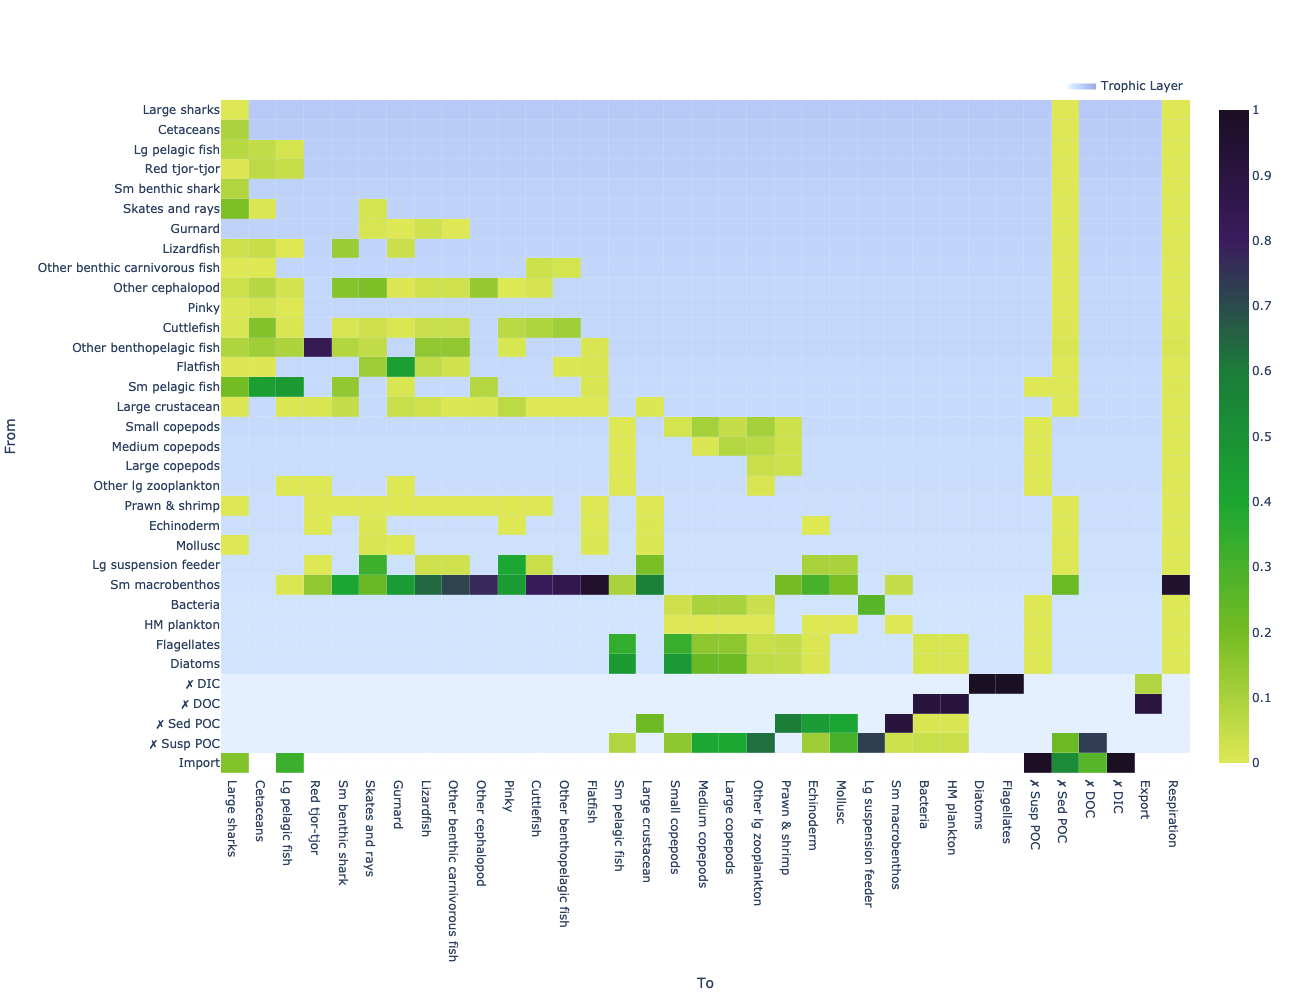

In [8]:
fw.draw_heatmap(foodweb, normalization='diet', show_trophic_layer=True, boundary=True, height=1000)

## A graph

A natural way of representing graphs (networks) is just to draw the vertices and links between them.
To improve readability we present them in an interactive form. There are possibilities to zoom, drag and drop and further adjust the plot via parameters.

Food webs have a natural hierarchy, described by trophic levels. Therefore, the vertical positions of nodes represent their trophic levels. 

When drawing graphs, readability demands adjusting node positions to minimize clutter and overlap of nodes and links. A helpful algorithm uses an analogy with a physical system: nodes repel each other and links act like springs. This algorithm is used to optimize horizontal positions of nodes.

The method's documentation with available parameters is presented below:

In [9]:
help(fw.draw_network_for_nodes)

Help on function draw_network_for_nodes in module foodwebviz.visualization:

draw_network_for_nodes(food_web, nodes=None, file_name='food_web.html', notebook=True, height='800px', width='100%', no_flows_to_detritus=True, **kwargs)
    Visualize subgraph of foodweb as a network.
    Parameters notebook, height, and width refer to initialization parameters of pyvis.network.Network.
    Additional parameters may be passed to hierachical repulsion layout as defined in
    pyvis.network.Network.hrepulsion. Examples are: node_distance, central_gravity,
    spring_length, or spring_strength.
    
    Parameters
    ----------
    food_web : foodwebs.FoodWeb
        Foodweb object.
    nodes : list of strings
        Nodes to include in subgraph to visualize.
    file_name : string, optional (default="food_web.html")
        File to save network (in html format)
    notebook - bool, optional (default=True)
        True if using jupyter notebook.
    height : string, optional (default="800px")


Whole food webs might have too many nodes and connections to be clearly readable in this format. Therefore, we provide a way to draw only a part of the network. If 'nodes' parameter is specified, only the given nodes and their neighbours (nodes they directly interact with) are drawn.

In [10]:
fw.draw_network_for_nodes(foodweb, ['Echinoderm'])

## Trophic flows distributions as bar plots


One can aggregate nodes into integer trophic levels to summarize certain aspects of a food web. A stacked bar plot shows percentages of flows from one trophic level to another. Color bars and numbers indicate the flow distribution around each trophic level, marked on the Y axis. Optionally, they can be normalized to 100\%.

The method's documentation with available parameters is presented below:

In [11]:
help(fw.draw_trophic_flows_distribution)

Help on function draw_trophic_flows_distribution in module foodwebviz.visualization:

draw_trophic_flows_distribution(food_web, normalize=True, width=1000, height=800)
    Visualize flows between trophic levels as a stacked bar chart.
    
    Parameters
    ----------
    food_web : foodwebs.FoodWeb
        Foodweb object.
    normalize : bool, optional (default=True)
        If True, bars will represent percentages summing up to 100
    width : int, optional (default=600)
        Width of the plot.
    height : int, optional (default=800)
        Height of the plot.
    
    Returns
    -------
    heatmap : plotly.graph_objects.Figure



Example:

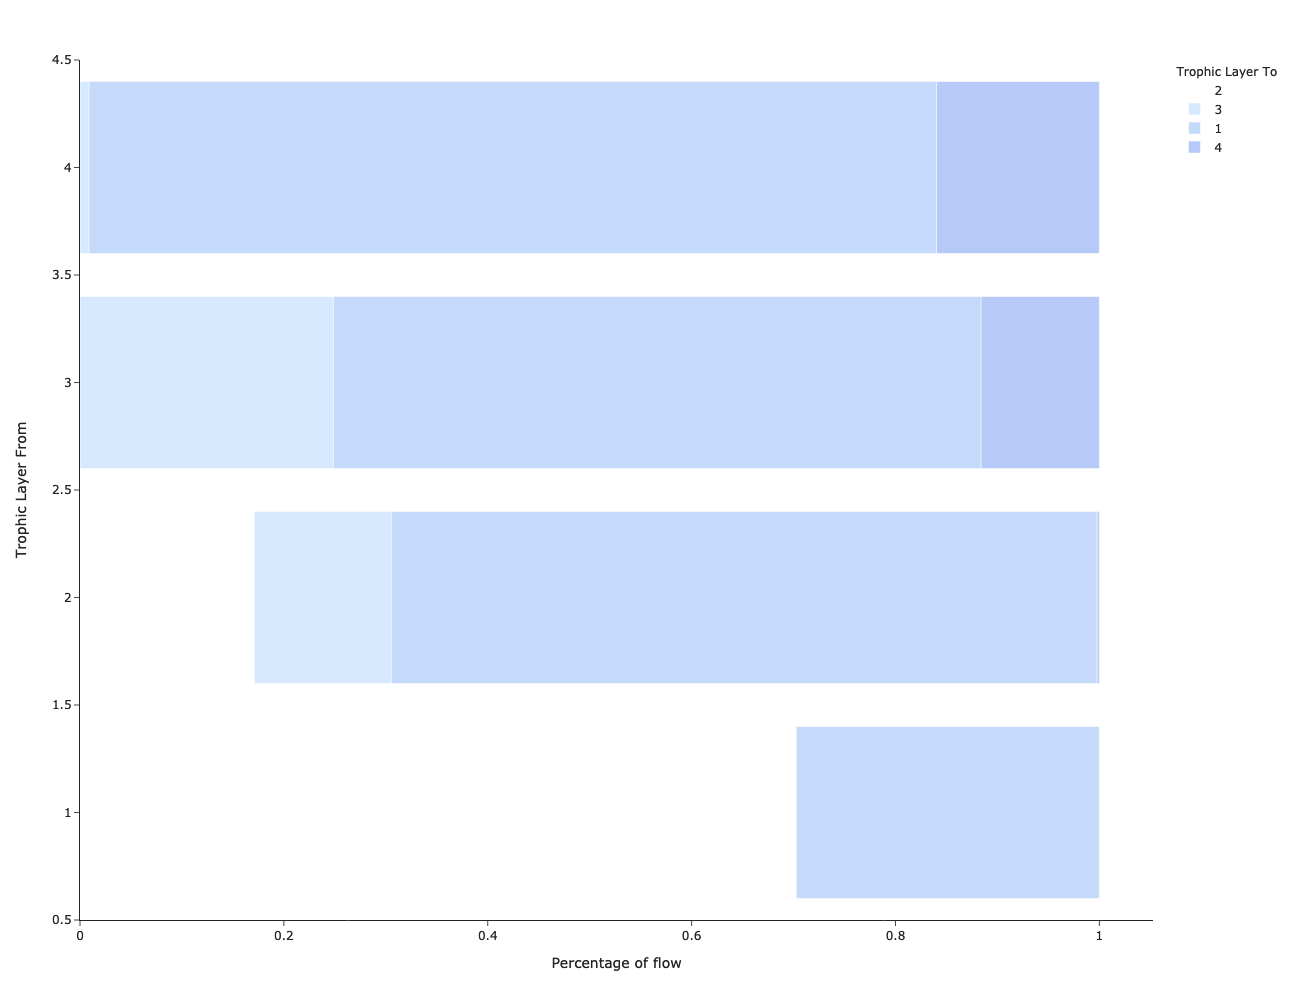

In [12]:
fw.draw_trophic_flows_distribution(foodweb)

## A heatmap of trophic flows

This heatmap visualization presents the sum of all flows between trophic levels. The color intensity encodes the flow sum for the trophic levels on the axes. The color scale can be transformed to a logarithmic scale.

Method's documentation with available parameters is presented below:

In [13]:
help(fw.draw_trophic_flows_heatmap)

Help on function draw_trophic_flows_heatmap in module foodwebviz.visualization:

draw_trophic_flows_heatmap(food_web, switch_axes=False, normalization='log', width=1200, height=800)
    Visualize flows between foodweb's trophic levels as a heatmap. The
    color at (x,y) represents the sum of flows from trophic level x to
    trophic level y.
    
    Parameters
    ----------
    food_web : foodwebs.FoodWeb
        Foodweb object.
    normalization : string, optional (default=log)
        Defines method of graph edges normalization.
        Available options are: 'diet', 'log', 'donor_control',
        'predator_control', 'mixed_control', 'linear' and 'tst'.
    switch_axes : bool, optional (default=False)
        If True, X axis will represent "to" trophic levels and Y - "from".
    width : int, optional (default=1200)
        Width of the plot.
    height : int, optional (default=800)
        Height of the plot.
    
    Returns
    -------
    heatmap : plotly.graph_objects.Figure


Example:

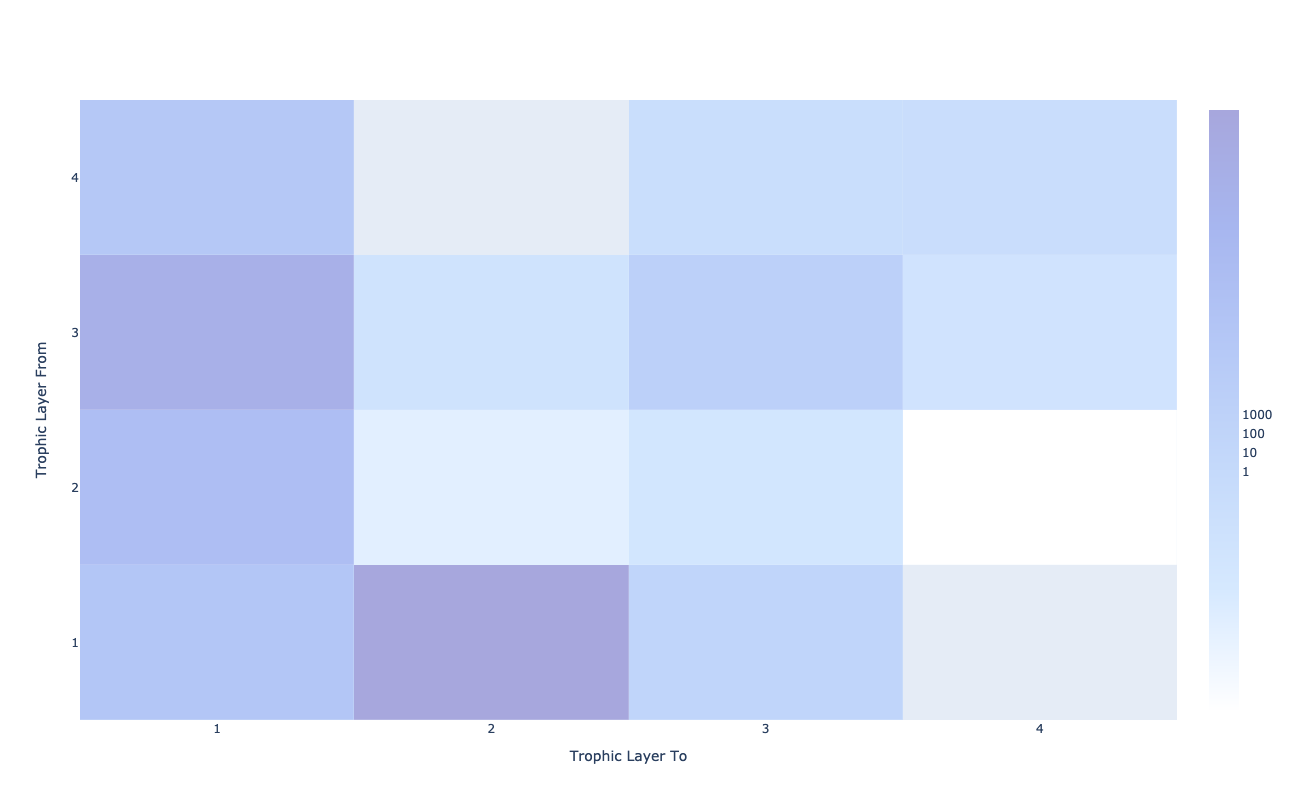

In [14]:
fw.draw_trophic_flows_heatmap(foodweb, normalization='log')

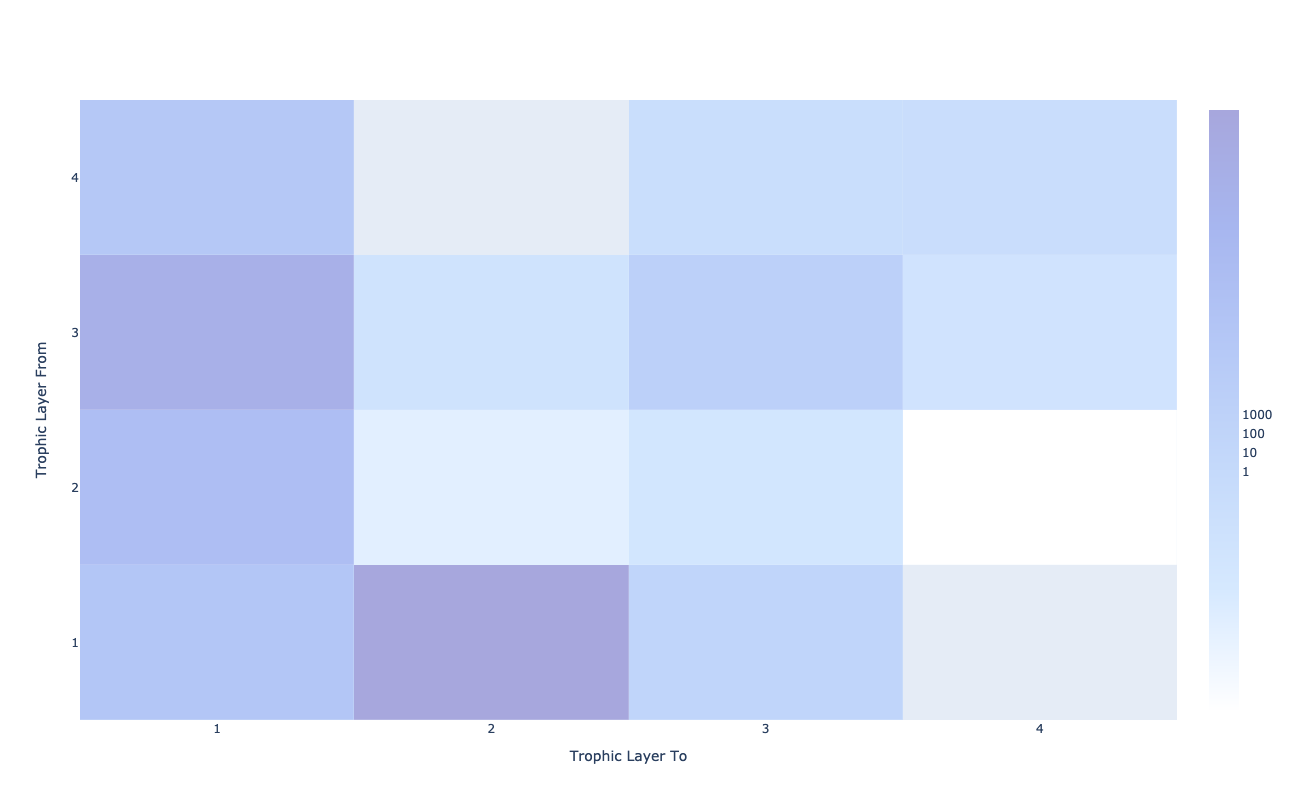

In [15]:
fw.draw_trophic_flows_heatmap(foodweb, normalization='log')